In [33]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [23]:
pip install --upgrade pandas

     ---------------------------------------- 10.8/10.8 MB 1.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'F:\\New folder\\anaconda\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
Tdata=pd.read_excel("Traffic dataset.xlsx",skiprows=1)
Tdata

,Establishment,Employees,vehicles
0,Salarpuria soft zone,15000,6500
1,wipro(kodathi and Doddakanaheli),12000,5000
2,"RGA Tech park, sarjapura road",30000,9000
3,Ecospace & Pritech,100000,60000
4,"Microsoft ,Iblur",3500,2000
5,Global tech Park(five buildings),6000,3000
6,Ecoworld(10 buildings) Adarsh palm(1.8k houses),150000,100000
7,mantri Espana & shobha corporate office,5000,2000
8,Intel,2500,1000
9,"Vaishnavi tech park, bellandur sarjapura road",5500,2500


In [3]:
Tdata= Tdata[:-1]
Tdata

,Establishment,Employees,vehicles
0,Salarpuria soft zone,15000,6500
1,wipro(kodathi and Doddakanaheli),12000,5000
2,"RGA Tech park, sarjapura road",30000,9000
3,Ecospace & Pritech,100000,60000
4,"Microsoft ,Iblur",3500,2000
5,Global tech Park(five buildings),6000,3000
6,Ecoworld(10 buildings) Adarsh palm(1.8k houses),150000,100000
7,mantri Espana & shobha corporate office,5000,2000
8,Intel,2500,1000
9,"Vaishnavi tech park, bellandur sarjapura road",5500,2500


In [4]:
Tdata.shape

(19, 3)

In [5]:
Tdata.describe()

,Employees,vehicles
count,19.000000,19.000000
mean,33815.789474,17831.578947
std,42859.658099,26334.178312
min,2500.000000,800.000000
25%,5750.000000,2750.000000
50%,12000.000000,5000.000000
75%,52500.000000,25500.000000
max,150000.000000,100000.000000


In [28]:
Tdata.isnull().sum()

Establishment    0
Employees        0
vehicles         0
dtype: int64

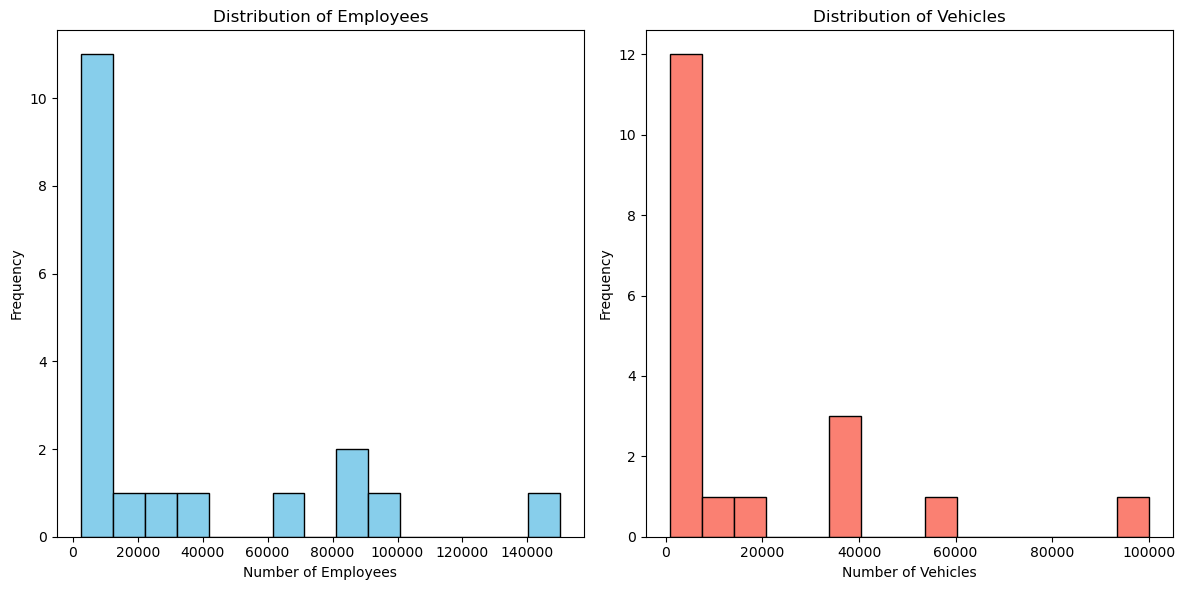

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


# Plot distribution of Employees
axes[0].hist(Tdata['Employees'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Employees')
axes[0].set_xlabel('Number of Employees')
axes[0].set_ylabel('Frequency')

# Plot distribution of Vehicles
axes[1].hist(Tdata['vehicles'], bins=15, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Vehicles')
axes[1].set_xlabel('Number of Vehicles')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Employees Intrepration
. The x-axis represents the number of employees, and the y-axis represents the frequency
(how many establishments fall into each employee count bin).
. 20k of Employees fall under high peak from 12 establishment areas.
. Establishmnet area with 1 area are having employee count with 40k,70k,140k.
. Establishmnet area with 2 areas are having employee count with 80k

#Vehicles Intrepretation
.The x-axis represents the number of vehicles, and the y-axis represents the frequency 
(how many establishments fall into each vehicle count bin).
. 10k of vehicles are fall under 12 establishment areas
.Establishment area with 1 are having vehcile count falling 20k,60k,100k.
. Establishment area with 3 are having vehcile count falling 40k

Considering factors 50% of employees are holding Vehicles where potentially high vehicles
from Big tech parks, areas.

In [ ]:
# Feature scaling for k-means

In [21]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Tdata_scaled = scaler.fit_transform(Tdata[['Employees', 'vehicles']])

F:\New folder\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
F:\New folder\anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [ ]:
# Using the Elbow Method to find the optimal number of clusters

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [25]:
distortions = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Tdata_scaled)
    distortions.append(kmeans.inertia_)

In [ ]:
# Plotting the Elbow Method

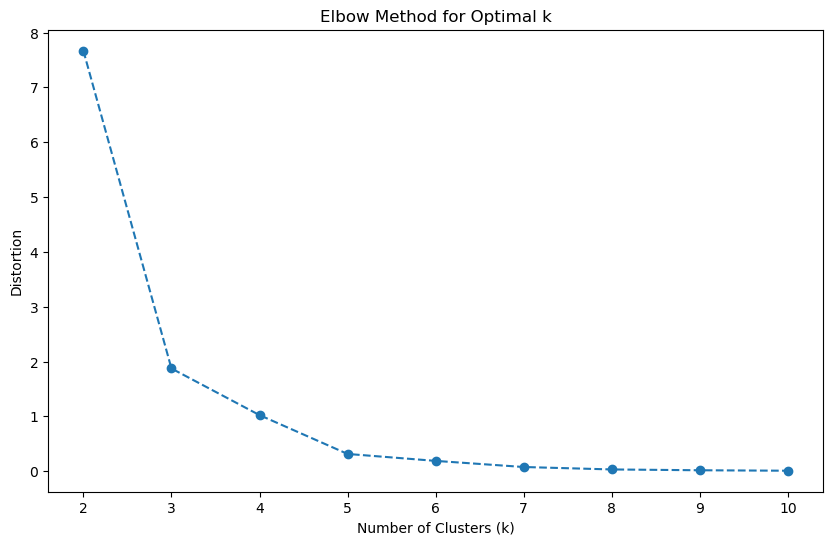

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

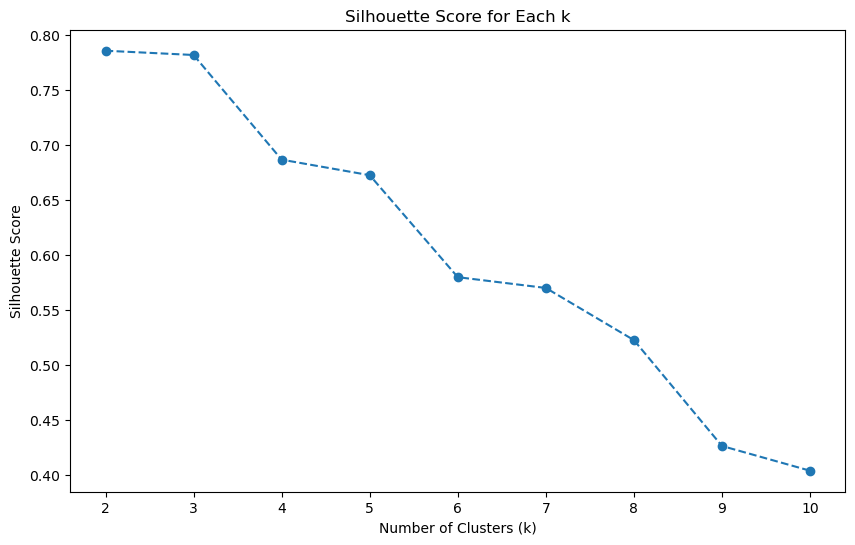

In [28]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Tdata_scaled)
    silhouette_scores.append(silhouette_score(Tdata_scaled, kmeans.labels_))

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each k')
plt.show()

C:\Users\91852\AppData\Local\Temp\ipykernel_21768\1420231600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tdata['Cluster'] = kmeans.fit_predict(Tdata_scaled)
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categor

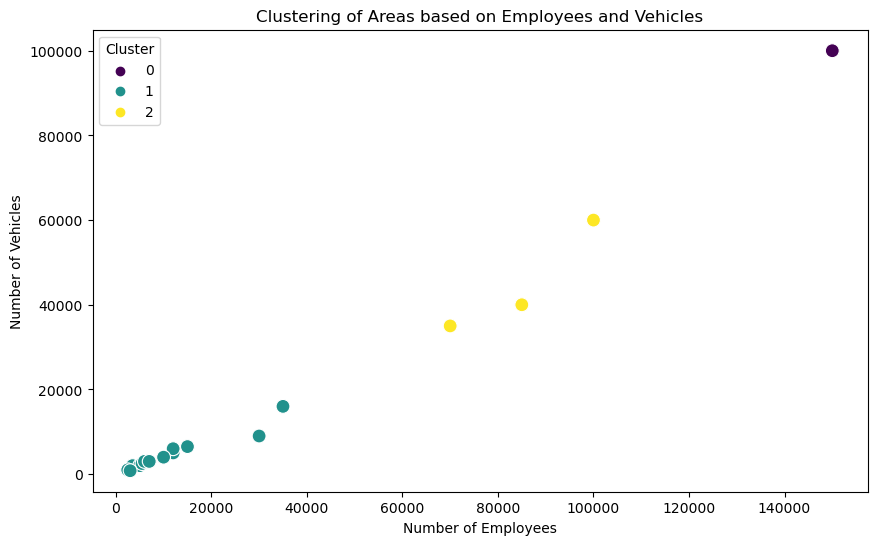

In [43]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
Tdata['Cluster'] = kmeans.fit_predict(Tdata_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employees', y='vehicles', hue='Cluster', data=Tdata, palette='viridis', s=100)
plt.title('Clustering of Areas based on Employees and Vehicles')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Vehicles')
plt.show()

C:\Users\91852\AppData\Local\Temp\ipykernel_21768\585611711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tdata['Cluster'] = kmeans.fit_predict(Tdata_scaled)
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\New folder\anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categori

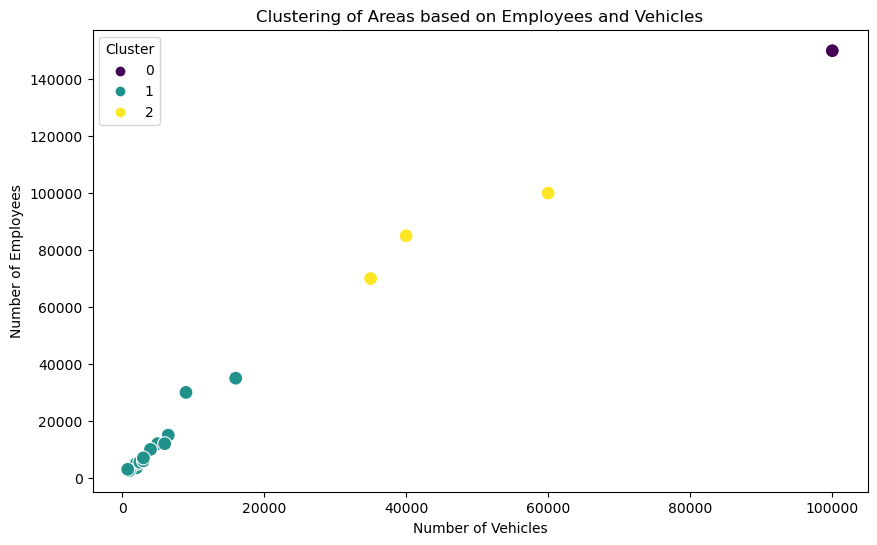

In [42]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
Tdata['Cluster'] = kmeans.fit_predict(Tdata_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicles',y='Employees', hue='Cluster', data=Tdata, palette='viridis', s=100)
plt.title('Clustering of Areas based on Employees and Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Employees')
plt.show()

In [46]:
Tdata=pd.DataFrame(Tdata)

In [49]:
Cdata=display(Tdata[['Establishment', 'Employees', 'vehicles', 'Cluster']])

,Establishment,Employees,vehicles,Cluster
0,Salarpuria soft zone,15000,6500,1
1,wipro(kodathi and Doddakanaheli),12000,5000,1
2,"RGA Tech park, sarjapura road",30000,9000,1
3,Ecospace & Pritech,100000,60000,2
4,"Microsoft ,Iblur",3500,2000,1
5,Global tech Park(five buildings),6000,3000,1
6,Ecoworld(10 buildings) Adarsh palm(1.8k houses),150000,100000,0
7,mantri Espana & shobha corporate office,5000,2000,1
8,Intel,2500,1000,1
9,"Vaishnavi tech park, bellandur sarjapura road",5500,2500,1


In [48]:
Tdata[['Establishment', 'Employees', 'vehicles', 'Cluster']].to_csv('Clustered data.csv',index=False)

In [66]:
Cdata1=pd.read_csv('Clustered data.csv')

cluster_0 = Cdata1[Cdata1['Cluster']==0]
cluster_0

,Establishment,Employees,vehicles,Cluster
6,Ecoworld(10 buildings) Adarsh palm(1.8k houses),150000,100000,0


In [ ]:
Intrepretation & Scope
.Ecoworld which is IT companies conglomerate and Adarsh palm retreat premium housing area which intact 
of employees count of 150k [ 1.5 lakhs] having 100k [1 lakh] vehicles.
. 70% of people having own vehicles, Adarsh palm retreats housing area where people tend to incline comfort 
and feasible transportation.
.Ecoworld of IT companies where employees are not particluar about transportation. All they need accesbile
and fast transportation.

In [74]:
cluster_1 = Cdata1[Cdata1['Cluster']==1]
cluster_1

,Establishment,Employees,vehicles,Cluster
0,Salarpuria soft zone,15000,6500,1
1,wipro(kodathi and Doddakanaheli),12000,5000,1
2,"RGA Tech park, sarjapura road",30000,9000,1
4,"Microsoft ,Iblur",3500,2000,1
5,Global tech Park(five buildings),6000,3000,1
7,mantri Espana & shobha corporate office,5000,2000,1
8,Intel,2500,1000,1
9,"Vaishnavi tech park, bellandur sarjapura road",5500,2500,1
10,kalyani Tech park(5 buildings),12000,6000,1
14,Salarpuria tech park(7 buildings),10000,4000,1


In [75]:
Temployees=cluster_1['Employees'].sum()
Tvehicles= cluster_1['vehicles'].sum()

print(f'Total Employees: {Temployees}')
print(f'Total Vehicles: {Tvehicles}')

Total Employees: 152500
Total Vehicles: 63800


In [ ]:
.Intrepretation & Scope
. Out of 14 establishment areas 12 areas belong to IT companies/ tech park and
1 is hospatial,1 is college.
. KR puram to Silkboard bustand where approx 30 buses are running over a day. Increase bus count in
the route will eliminate 2 wheelers.
. car pooling modes of transportation will eliminates the car with single person.
. Tuning the timings accordingly for specific departments where transportation can be managed.

In [76]:
cluster_2 = Cdata1[Cdata1['Cluster']==2]
cluster_2

,Establishment,Employees,vehicles,Cluster
3,Ecospace & Pritech,100000,60000,2
11,Embassy tech park(9 buildings),70000,35000,2
12,Prestige tech Park(18 buildings),85000,40000,2
13,Bagmane tech park (22 buildings),85000,40000,2


In [77]:
Temployees2=cluster_2['Employees'].sum()
Tvehicles2= cluster_2['vehicles'].sum()

print(f'Total Employees: {Temployees2}')
print(f'Total Vehicles: {Tvehicles2}')

Total Employees: 340000
Total Vehicles: 175000


In [ ]:
Intrepretation & Scope
. 4 Establishment areas are tech parks with large conglomeration of companies 50% of employees holding 
own vehicles.
.Office timings can be changed accordingly to eliminate traffic choke
.Pooling modes of transportation and rapido,ola companies should increase their count.
.Increase of govt buses will eliminate the 2 wheelers.